Level 1 Task 1

Task: Data Exploration and Preprocessing

Explore the dataset and identify the number
of rows and columns.

Check for missing values in each column and
handle them accordingly.

Perform data type conversion if necessary.
Analyze the distribution of the target variable
("Aggregate rating") and identify any class
imbalances.

In [196]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler

In [128]:
# Load the dataset
ds = pd.read_csv('Dataset .csv')
ds

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [130]:
# Random sample of 5 rows
ds.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
4890,18469935,Shanu's Chicken Planet,1,New Delhi,"1, Block C8, DDA Market, Keshav Puram, Lawrenc...",Lawrence Road,"Lawrence Road, New Delhi",77.160322,28.690546,"North Indian, Mughlai, Chinese, Italian",450,Indian Rupees(Rs.),No,No,No,No,1,3.2,Orange,Average,11
6364,18462589,Baskin Robbins,1,New Delhi,"G-17 and 18, New Rajdhani Enclave, Preet Vihar...",Preet Vihar,"Preet Vihar, New Delhi",77.294171,28.642713,Ice Cream,300,Indian Rupees(Rs.),No,Yes,No,No,1,0.0,White,Not rated,1
2087,18306533,The Brewhouse,1,Gurgaon,"Fortune Select Excalibur, Sector 49, Sohna Roa...",Sohna Road,"Sohna Road, Gurgaon",77.041790,28.415939,Continental,2500,Indian Rupees(Rs.),Yes,No,No,No,4,4.1,Green,Very Good,56
3562,304531,Punjabi Rasoi,1,New Delhi,"25/32, Near Fedex, East Patel Nagar, New Delhi",East Patel Nagar,"East Patel Nagar, New Delhi",77.175628,28.643508,North Indian,200,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,2
7188,18350234,Spanish Delights,1,New Delhi,"118, Shahpur Jat, New Delhi",Shahpur Jat,"Shahpur Jat, New Delhi",77.215411,28.549644,Ice Cream,200,Indian Rupees(Rs.),No,No,No,No,1,3.5,Yellow,Good,23


In [131]:
# Display a summary of the DataSet 
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [139]:
# Identify number of rows and columns
rows, cols = ds.shape
print(f'Number of Rows: {rows}')
print(f'Number of Columns: {cols}')

Number of Rows: 9551
Number of Columns: 21


In [142]:
# Handle missing values in the 'Cuisines' column
ds['Cuisines']=ds['Cuisines'].fillna('Unknown')

In [135]:
# Print the count of missing values for each column after filling missing values in the 'Cuisines' column
print(f'Count of Missing Values: {ds.isnull().sum()}')

Count of Missing Values: Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [143]:
# Check for data type conversion 
print('\nData Types:', ds.dtypes)


Data Types: Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


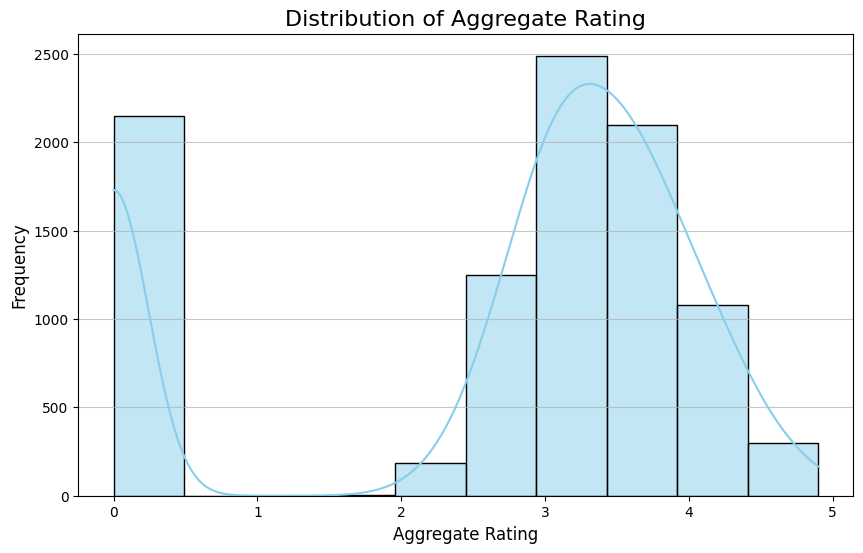

In [144]:
# Analyze the distribution of the target variable ('Aggregate rating')
plt.figure(figsize=(10,6))
sns.histplot(ds['Aggregate rating'],bins=10,kde=True,color='skyblue')
plt.title('Distribution of Aggregate Rating',fontsize=16)
plt.xlabel('Aggregate Rating',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.show()

In [145]:
# Check for class imbalances
rating_counts = ds['Aggregate rating'].value_counts()
print('\nAggregate Rating Counts:', rating_counts)


Aggregate Rating Counts: Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


Level 1 Task 2

Task: Descriptive Analysis

Calculate basic statistical measures (mean,
median, standard deviation, etc.) for numerical
columns.

Explore the distribution of categorical
variables like "Country Code,

" "City,

" and

"Cuisines.
"

Identify the top cuisines and cities with the
highest number of restaurants.

In [146]:
# Calculate basic statistical measures for numerical columns
numerical_stats = ds.describe()
print('Basic Statistical Measures for Numerical Columns:\n')
print(numerical_stats.to_string())

Basic Statistical Measures for Numerical Columns:

       Restaurant ID  Country Code   Longitude    Latitude    Average Cost for two  Price range  Aggregate rating      Votes   
count  9.551000e+03    9551.000000  9551.000000  9551.000000        9551.000000     9551.000000     9551.000000     9551.000000
mean   9.051128e+06      18.365616    64.126574    25.854381        1199.210763        1.804837        2.666370      156.909748
std    8.791521e+06      56.750546    41.467058    11.007935       16121.183073        0.905609        1.516378      430.169145
min    5.300000e+01       1.000000  -157.948486   -41.330428           0.000000        1.000000        0.000000        0.000000
25%    3.019625e+05       1.000000    77.081343    28.478713         250.000000        1.000000        2.500000        5.000000
50%    6.004089e+06       1.000000    77.191964    28.570469         400.000000        2.000000        3.200000       31.000000
75%    1.835229e+07       1.000000    77.282006    28

In [147]:
# Explore the distribution of categorical variables
# Country Code distribution
country_code_dist.columns = ['Country Code','Count']
print('\nDistrubution of "Country Code":')
print(country_code_dist.to_string(index=False))


Distrubution of "Country Code":
 Country Code  Count
       1       8652 
     216        434 
     215         80 
      30         60 
     214         60 
     189         60 
     148         40 
     208         34 
      14         24 
     162         22 
      94         21 
     184         20 
     166         20 
     191         20 
      37          4 


In [148]:
# City distribution
city_dist = ds['City'].value_counts().reset_index()
city_dist.columns = ['City','Count']
print('\nDistrubution of "City":')
print(city_dist.to_string(index=False))


Distrubution of "City":
         City           Count
             New Delhi  5473 
               Gurgaon  1118 
                 Noida  1080 
             Faridabad   251 
             Ghaziabad    25 
          Bhubaneshwar    21 
              Amritsar    21 
             Ahmedabad    21 
               Lucknow    21 
              Guwahati    21 
              Ludhiana    20 
        Rest of Hawaii    20 
                 Kochi    20 
               Kolkata    20 
             Pocatello    20 
             Pensacola    20 
                Mumbai    20 
             Mangalore    20 
             Singapore    20 
               Orlando    20 
                Mysore    20 
                Nagpur    20 
                Nashik    20 
            Coimbatore    20 
              Dehradun    20 
              Savannah    20 
             Tampa Bay    20 
            Sioux City    20 
             Abu Dhabi    20 
             Bangalore    20 
            Aurangabad    20 
             Al

In [149]:
# Cuisines distribution
cuisine_dist = ds['Cuisines'].value_counts().reset_index()
city_dist.columns = ['Cuisine','Count']
print('\nDistrubution of "Cuisines":')
print(cuisine_dist.to_string(index=False))


Distrubution of "Cuisines":
                                           Cuisines                                            count
                                                                                 North Indian  936  
                                                                        North Indian, Chinese  511  
                                                                                      Chinese  354  
                                                                                    Fast Food  354  
                                                                        North Indian, Mughlai  334  
                                                                                         Cafe  299  
                                                                                       Bakery  218  
                                                               North Indian, Mughlai, Chinese  197  
                                                              

In [150]:
# Identify the top cuisines and cities with the highest number of restaurants
top_cuisines = cuisine_dist.head(10)
top_cities = city_dist.head(10)
# Display top 10 cuisines
print('Top 10 Cuisines with the Highest Number of Restaurants:')
print(top_cuisines.to_string(index=False))

Top 10 Cuisines with the Highest Number of Restaurants:
           Cuisines             count
                  North Indian  936  
         North Indian, Chinese  511  
                       Chinese  354  
                     Fast Food  354  
         North Indian, Mughlai  334  
                          Cafe  299  
                        Bakery  218  
North Indian, Mughlai, Chinese  197  
              Bakery, Desserts  170  
                   Street Food  149  


In [151]:
# Display top 10 cities
print('Top 10 Cities with the Highest Number of Restaurants:')
print(top_cities.to_string(index=False))

Top 10 Cities with the Highest Number of Restaurants:
  Cuisine     Count
   New Delhi  5473 
     Gurgaon  1118 
       Noida  1080 
   Faridabad   251 
   Ghaziabad    25 
Bhubaneshwar    21 
    Amritsar    21 
   Ahmedabad    21 
     Lucknow    21 
    Guwahati    21 


task 3 level 1

Task: Geospatial Analysis

Visualize the locations of restaurants on a
map using latitude and longitude
information.

Analyze the distribution of restaurants
across different cities or countries.

Determine if there is any correlation
between the restaurant's location and its
rating.

In [190]:
unique_rating_colors = ds['Rating color'].unique()

# Print the unique values
print(unique_rating_colors)

['Dark Green' 'Green' 'Yellow' 'Orange' 'White' 'Red']


In [191]:
# Check the distribution of ratings and their corresponding colors
rating_color_mapping = ds[['Aggregate rating', 'Rating color']].dropna()

# Group by the rating color and show the corresponding aggregate ratings
color_rating_mapping = rating_color_mapping.groupby('Rating color')['Aggregate rating'].unique()

# Print the mapping of color to aggregate ratings
print(color_rating_mapping)

Rating color
Dark Green                            [4.8, 4.5, 4.9, 4.7, 4.6]
Green                                 [4.4, 4.0, 4.2, 4.3, 4.1]
Orange        [3.0, 3.2, 3.1, 3.3, 3.4, 2.9, 2.6, 2.8, 2.7, ...
Red                         [2.2, 2.4, 2.1, 1.8, 2.0, 2.3, 1.9]
White                                                     [0.0]
Yellow                                [3.6, 3.8, 3.7, 3.9, 3.5]
Name: Aggregate rating, dtype: object


In [353]:
# 'ds' already has columns 'Aggregate rating' and 'Rating color'
# Initialize counters for different rating categories
high_rated = medium_rated = low_rated = no_rating = 0

# Create the restaurant map
restaurant_map = folium.Map(location=[ds['Latitude'].mean(), ds['Longitude'].mean()], zoom_start=12)

# Add restaurant markers with color-coded ratings using CircleMarkers
for _, row in ds.iterrows():
    rating = row.get('Aggregate rating', None)
    color = row.get('Rating color', 'blue')  # Use existing 'Rating color' column

    # Determine label based on rating
    if pd.notna(rating):
        if color == 'Dark Green':
            label = 'High-rated (>= 4.5)'
            high_rated += 1
        elif color == 'Green':
            label = 'Medium-rated (4.0 - 4.4)'
            medium_rated += 1
        elif color == 'Yellow':
            label = 'Medium-rated (3.5 - 3.9)'
            medium_rated += 1
        elif color == 'Orange':
            label = 'Low-rated (2.6 - 3.4)'
            low_rated += 1
        elif color == 'Red':
            label = 'Very Low-rated (< 2.6)'
            low_rated += 1
        elif color == 'White':
            label = 'No rating (0.0)'
            no_rating += 1
        else:
            label = 'Unknown rating'
            no_rating += 1
    else:
        label = 'No rating'
        no_rating += 1

    # Add CircleMarker with a popup for details
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=8,  # Adjust the size of the marker
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"Name: {row.get('Restaurant Name', 'Unknown')}<br>"
              f"Rating: {rating if pd.notna(rating) else 'N/A'}<br>"
              f"Category: {label}",
    ).add_to(restaurant_map)

# Add a legend to the map (custom HTML for clarity)
legend_html = """
 <div style="
 position: fixed; 
 bottom: 50px; left: 50px; width: 250px; height: 200px; 
 background-color: white; z-index:9999; font-size:14px; 
 border:2px solid grey; padding: 10px;">
 <b>Ratings Legend:</b><br>
 <i style="color:green;">&#9679;</i> Rating > 4.4 (Green)<br>
 <i style="color:darkgreen;">&#9679;</i> Rating >= 4.5 (Dark Green)<br>
 <i style="color:orange;">&#9679;</i> Rating 2.6 - 3.4 (Orange)<br>
 <i style="color:red;">&#9679;</i> Rating < 2.6 (Red)<br>
 <i style="color:yellow;">&#9679;</i> Rating 3.5 - 3.9 (Yellow)<br>
 <i style="color:white;">&#9679;</i> No Rating (White)<br>
 </div>
"""
restaurant_map.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
restaurant_map.save("restaurants_locations_maps.html")

# Print summary of ratings
print(f"Map has been generated.")


Map has been generated.


In [154]:
# Distribution of restaurants across cities or countries
# City-level distribution
city_distribution = dataset['City'].value_counts()
print("\nTop 10 Cities with Most Restaurants:")
print(city_distribution.head(10))


Top 10 Cities with Most Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


In [156]:
# Country-level distribution (if 'Country Code' corresponds to a country)
country_distribution = dataset['Country Code'].value_counts()
print("\nTop 10 Countries with Most Restaurants:")
print(country_distribution.head(10))


Top 10 Countries with Most Restaurants:
Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64


In [354]:
# Correlation between location and rating
# Analyze average rating by city
average_rating_by_city = ds.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nTop 10 Cities with Highest Average Ratings:")
print(average_rating_by_city.head(10))


Top 10 Cities with Highest Average Ratings:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Tagaytay City       4.500000
Secunderabad        4.500000
Name: Aggregate rating, dtype: float64


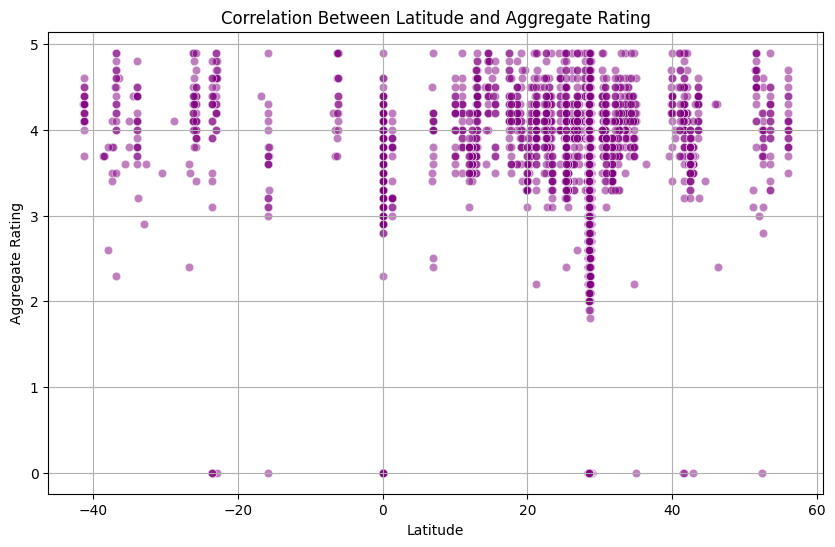

In [162]:
# Visualize correlation with a scatter plot (latitude vs. rating)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds, x='Latitude', y='Aggregate rating', alpha=0.5, color='purple')
plt.title('Correlation Between Latitude and Aggregate Rating')
plt.xlabel('Latitude')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()

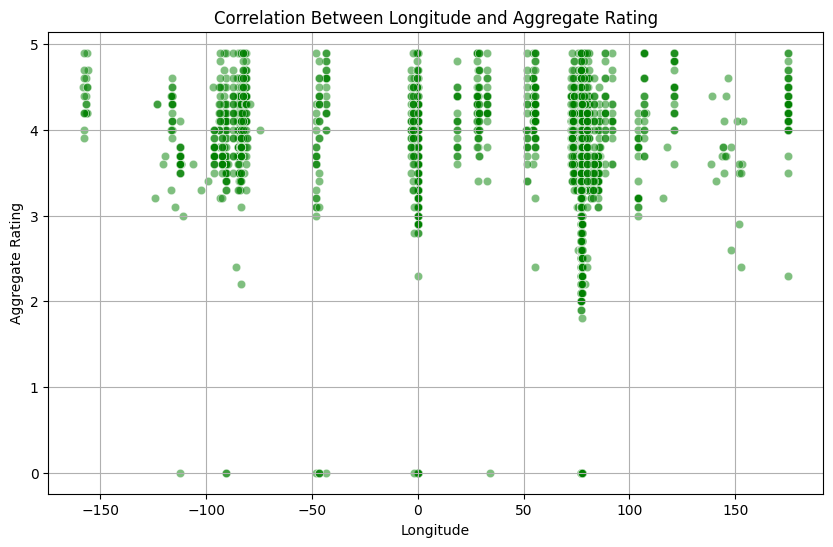

In [163]:
# Visualize correlation with a scatter plot (longitude vs. rating)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds, x='Longitude', y='Aggregate rating', alpha=0.5, color='green')
plt.title('Correlation Between Longitude and Aggregate Rating')
plt.xlabel('Longitude')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()

level 2 task 1

Task: Table Booking and Online Delivery

Determine the percentage of restaurants that
offer table booking and online delivery.

Compare the average ratings of restaurants
with table booking and those without.

Analyze the availability of online delivery
among restaurants with different price ranges.

In [355]:
# Percentage of Restaurants Offering Table Booking and Online Delivery
# Percentage of restaurants offering Table Booking
table_booking_percentage = ds['Has Table booking'].value_counts(normalize=True) * 100
print("Percentage of Restaurants Offering Table Booking:\n")
print(table_booking_percentage)

Percentage of Restaurants Offering Table Booking:

Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64


In [165]:
# Percentage of restaurants offering Online Delivery
online_delivery_percentage = ds['Has Online delivery'].value_counts(normalize=True) * 100
print("Percentage of Restaurants Offering Online Delivery:\n")
print(online_delivery_percentage)

Percentage of Restaurants Offering Online Delivery:

Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


In [166]:
# Compare the Average Ratings of Restaurants with Table Booking and Those Without
# First, let's ensure we handle missing values for ratings
average_rating_table_booking = ds.groupby('Has Table booking')['Aggregate rating'].mean()
print("Average Ratings for Restaurants with Table Booking vs Without:\n")
print(average_rating_table_booking)

Average Ratings for Restaurants with Table Booking vs Without:

Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


In [167]:
# Analyze Online Delivery Availability Among Restaurants with Different Price Ranges
# Assuming 'Price range' is a column in the dataset
online_delivery_by_price = ds.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0) * 100
print("Availability of Online Delivery Among Restaurants with Different Price Ranges:\n")
print(online_delivery_by_price)

Availability of Online Delivery Among Restaurants with Different Price Ranges:

Has Online delivery     No         Yes   
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


level 2 task 2

Task: Price Range Analysis

Determine the most common price range
among all the restaurants.

Calculate the average rating for each price
range.

Identify the color that represents the highest
average rating among different price ranges.

In [168]:
# Determine the most common price range
most_common_price_range = ds['Price range'].mode()[0]
print("Most Common Price Range:", most_common_price_range)

Most Common Price Range: 1


In [169]:
# Calculate the average rating for each price range
avg_rating_per_price_range = dataset.groupby('Price range')['Aggregate rating'].mean()
print("Average Rating for Each Price Range:\n")
print(avg_rating_per_price_range)

Average Rating for Each Price Range:

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [170]:
# Identify the color that represents the highest average rating among different price ranges
# We'll identify the color by grouping the data by price range and selecting the most frequent rating color for each range.
rating_color_for_price_range = ds.groupby('Price range')['Rating color'].agg(lambda x: x.mode()[0])
print("Rating Color Representing the Highest Average Rating for Each Price Range:\n")
print(rating_color_for_price_range)

Rating Color Representing the Highest Average Rating for Each Price Range:

Price range
1    Orange
2    Orange
3    Yellow
4    Yellow
Name: Rating color, dtype: object


Level 2 Task 3

Task: Feature Engineering

Extract additional features from the existing
columns, such as the length of the restaurant
name or address.

Create new features like "Has Table Booking"
or "Has Online Delivery" by encoding
categorical variables.

In [171]:
# Extract the length of the restaurant name
ds['Name Length'] = ds['Restaurant Name'].apply(len)

In [172]:
# Extract the length of the address
ds['Address Length'] = ds['Address'].apply(len)

In [173]:
# Create new features like 'Has Table Booking' and 'Has Online Delivery'
# Assuming the columns for table booking and online delivery are 'Table booking' and 'Online delivery' (replace with actual column names)

# Convert 'Yes'/'No' to 1/0 for binary encoding
ds['Table Booking'] = ds['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
ds['Online Delivery'] = ds['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

In [174]:
# Display the dataset with the new features in a readable format
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
pd.set_option('display.width', 1000)        # Ensure the output fits in the screen width
pd.set_option('display.colheader_justify', 'center')  # Center the headers for better readability
print(ds[['Restaurant Name', 'Address', 'Name Length', 'Address Length', 'Table Booking', 'Online Delivery']].head())

      Restaurant Name                          Address                        Name Length  Address Length  Table Booking  Online Delivery
0        Le Petit Souffle  Third Floor, Century City Mall, Kalayaan Avenu...      16             71              1               0       
1        Izakaya Kikufuji  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...      16             67              1               0       
2  Heat - Edsa Shangri-La  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...      22             56              1               0       
3                    Ooma  Third Floor, Mega Fashion Hall, SM Megamall, O...       4             70              0               0       
4             Sambo Kojin  Third Floor, Mega Atrium, SM Megamall, Ortigas...      11             64              1               0       


Level 3 Task 1

Task: Predictive Modeling

Build a regression model to predict the
aggregate rating of a restaurant based on
available features.

Split the dataset into training and testing sets
and evaluate the model's performance using
appropriate metrics.

Experiment with different algorithms (e.g.,
linear regression, decision trees, random
forest) and compare their performance.

In [177]:
# Feature selection: Choose relevant features for prediction
features = ['Name Length', 'Address Length', 'Table Booking', 'Online Delivery', 'Price range']  # Example features
X = ds[features]
y = ds['Aggregate rating']

In [178]:
# Handle missing values in the target variable (if any)
X = X.dropna()
y = y[X.index]  # Remove the rows from y corresponding to rows removed from X

In [179]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
# Feature Scaling (optional but helpful for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [181]:
# Step 3: Experiment with different regression algorithms

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# 2. Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# 3. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [199]:
# Step 4: Evaluate the models

def evaluate_model(model_name, predictions, true_values):
    mae = mean_absolute_error(true_values, predictions)
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(true_values, predictions)
    evs = explained_variance_score(true_values, predictions)  # Explained Variance Score
    print(f'{model_name}:')
    print(f'Mean Absolute Error (MAE): {mae:.3f}')
    print(f'Mean Squared Error (MSE): {mse:.3f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
    print(f'R-squared (R²): {r2:.3f}')
    print(f'Explained Variance Score (EVS): {evs:.3f}\n')

In [210]:
# Evaluate each model and store results
lr_results = evaluate_model('Linear Regression\n', lr_pred, y_test)

Linear Regression
:
Mean Absolute Error (MAE): 1.093
Mean Squared Error (MSE): 1.742
Root Mean Squared Error (RMSE): 1.320
R-squared (R²): 0.234
Explained Variance Score (EVS): 0.235



In [211]:
dt_results = evaluate_model('Decision Tree Regressor\n', dt_pred, y_test)

Decision Tree Regressor
:
Mean Absolute Error (MAE): 1.222
Mean Squared Error (MSE): 2.795
Root Mean Squared Error (RMSE): 1.672
R-squared (R²): -0.228
Explained Variance Score (EVS): -0.228



In [212]:
rf_results = evaluate_model('Random Forest Regressor\n', rf_pred, y_test)

Random Forest Regressor
:
Mean Absolute Error (MAE): 1.118
Mean Squared Error (MSE): 2.179
Root Mean Squared Error (RMSE): 1.476
R-squared (R²): 0.043
Explained Variance Score (EVS): 0.044



Level 3 Task 2

Task: Customer Preference Analysis

Analyze the relationship between the type of
cuisine and the restaurant's rating.

Identify the most popular cuisines among
customers based on the number of votes.

Determine if there are any specific cuisines
that tend to receive higher ratings.

In [213]:
# Analyze the relationship between the type of cuisine and the restaurant's rating
# Split the 'Cuisines' column by comma and explode the list into separate rows
cuisines_expanded = ds['Cuisines'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
cuisines_expanded.name = 'Cuisine'

In [214]:
# Merge this expanded dataframe with the original dataset to get ratings for each cuisine
cuisines_df = ds[['Aggregate rating']].join(cuisines_expanded)

In [215]:
# Calculate the average rating for each cuisine
average_rating_by_cuisine = cuisines_df.groupby('Cuisine')['Aggregate rating'].mean().reset_index()

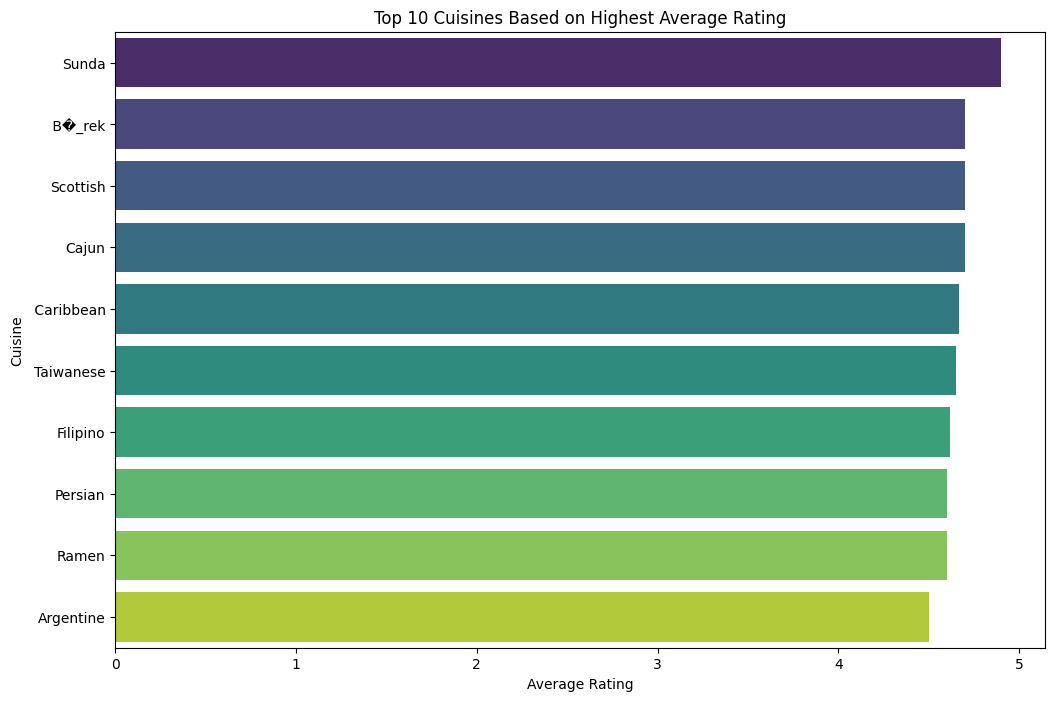

In [271]:
# Visualize the relationship between cuisines and ratings
plt.figure(figsize=(12, 8))
sns.barplot(data=top_rated_cuisines.head(10), x='Aggregate rating', y='Cuisine', hue='Cuisine', palette='viridis', legend=False)
plt.title('Top 10 Cuisines Based on Highest Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

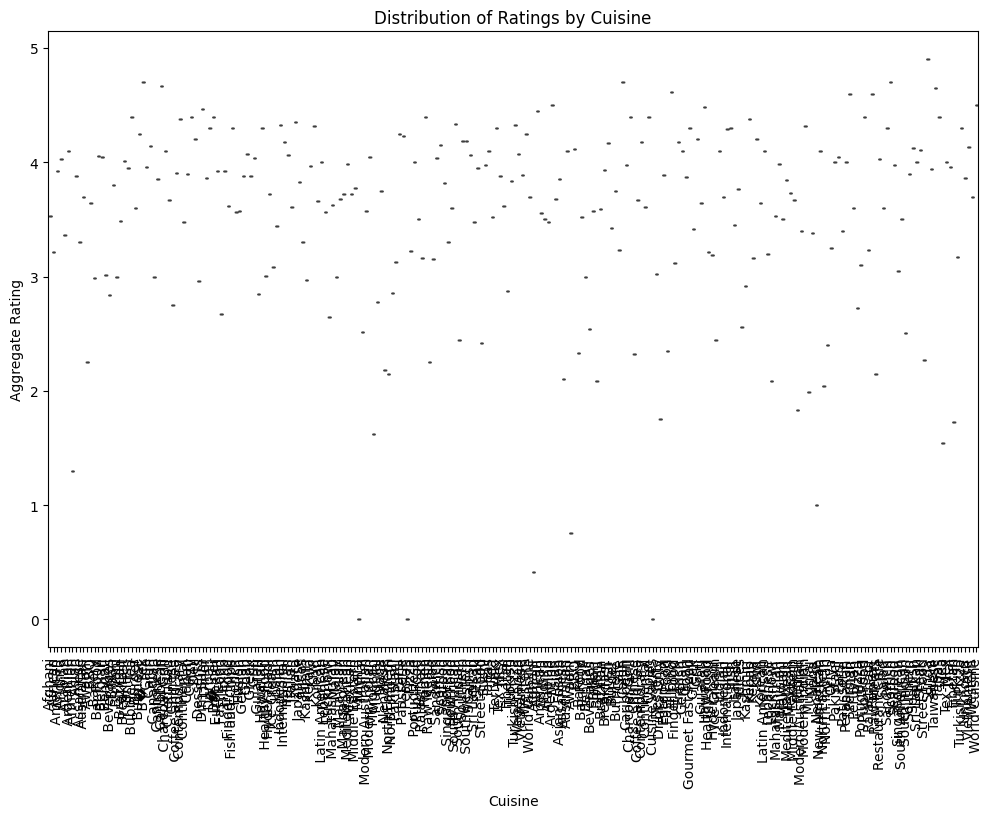

In [281]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=average_rating_by_cuisine, x='Cuisine', y='Aggregate rating', hue='Cuisine', palette='Set1', legend=False)
plt.xticks(rotation=90)  # Rotate x-axis labels to make them readable
plt.title('Distribution of Ratings by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Aggregate Rating')
plt.show()


In [237]:
# Identify the most popular cuisines based on the number of votes
# Clean the 'Cuisines' and 'Votes' columns (drop rows with missing values)
cuisines_with_votes = ds[['Cuisines', 'Votes']].dropna()

# Split the 'Cuisines' column into a list of cuisines and expand into a separate row for each cuisine
cuisines_with_votes_expanded = cuisines_with_votes.assign(Cuisine=cuisines_with_votes['Cuisines'].str.split(',')).explode('Cuisine')

In [238]:
# Clean up the 'Cuisine' column by stripping any leading/trailing spaces
cuisines_with_votes_expanded['Cuisine'] = cuisines_with_votes_expanded['Cuisine'].str.strip()

In [239]:
# Aggregate the total votes for each cuisine
votes_by_cuisine = cuisines_with_votes_expanded.groupby('Cuisine')['Votes'].sum().reset_index()

# Sort cuisines by total votes in descending order
votes_by_cuisine = votes_by_cuisine.sort_values('Votes', ascending=False)

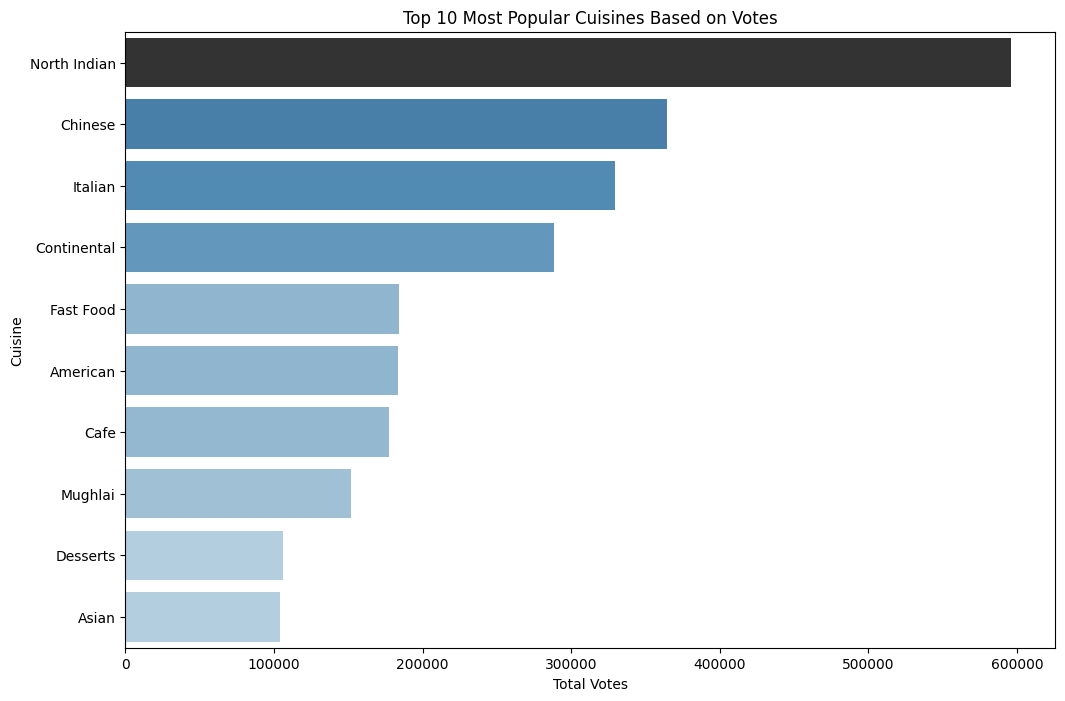

In [283]:
# Step 6: Visualize the top 10 most popular cuisines by total votes
plt.figure(figsize=(12, 8))
sns.barplot(data=votes_by_cuisine.head(10), x='Votes', y='Cuisine', hue='Votes', palette='Blues_d', legend=False)
plt.title('Top 10 Most Popular Cuisines Based on Votes')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.show()

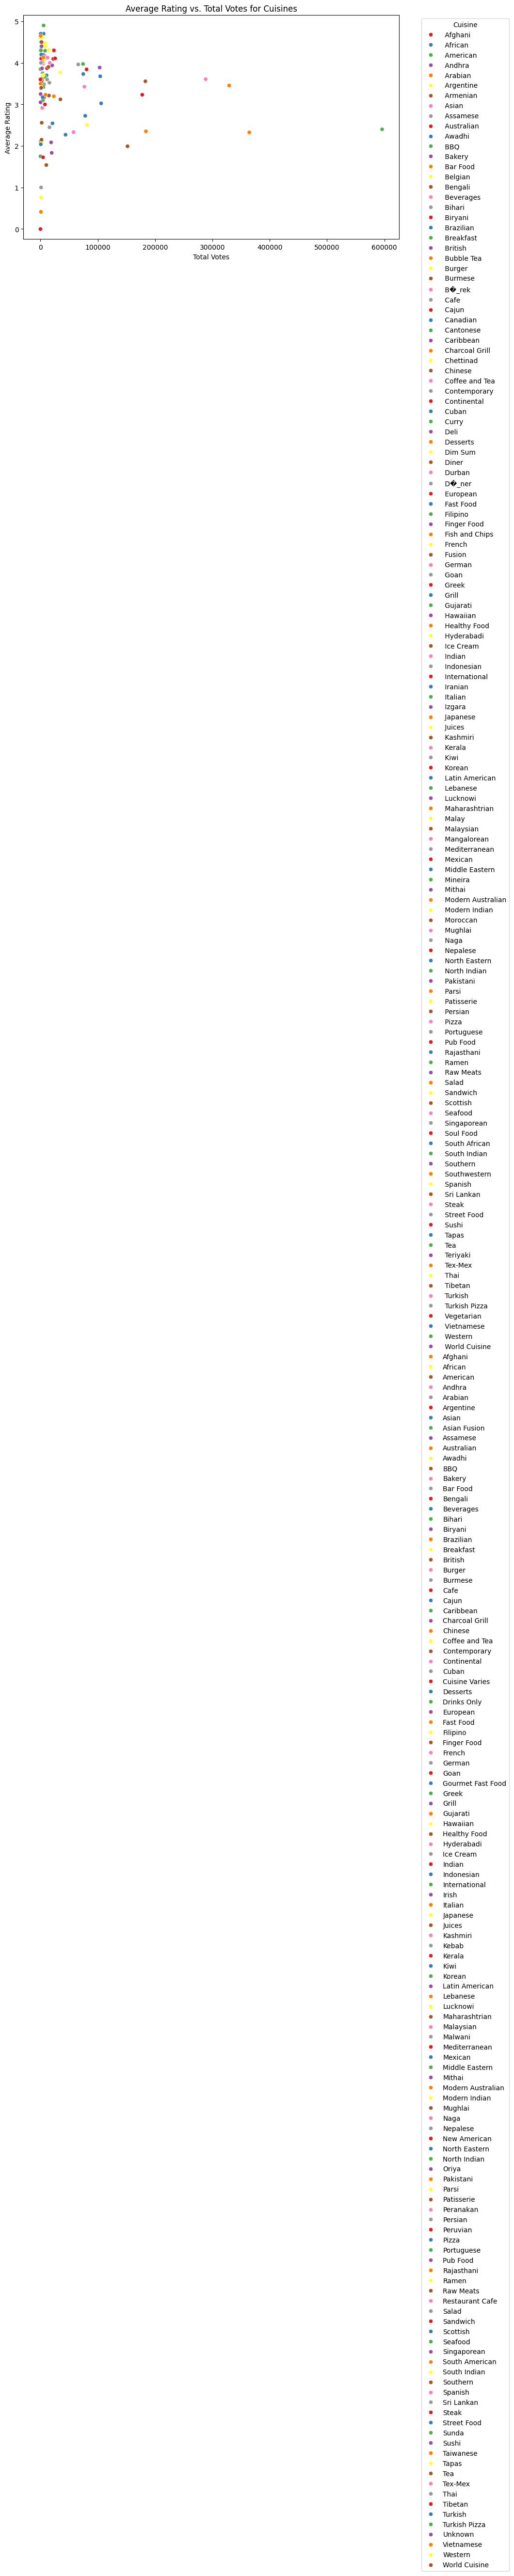

In [241]:
# Determine if there are any specific cuisines that tend to receive higher ratings
# Merge the cuisines_df and votes_by_cuisine to get the ratings and votes for each cuisine
cuisine_ratings_with_votes = average_rating_by_cuisine.merge(votes_by_cuisine, on='Cuisine', how='left')

# Visualize the relationship between average ratings and total votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cuisine_ratings_with_votes, x='Votes', y='Aggregate rating', hue='Cuisine', palette='Set1')
plt.title('Average Rating vs. Total Votes for Cuisines')
plt.xlabel('Total Votes')
plt.ylabel('Average Rating')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Level 3  Task 3

Task: Data Visualization

Create visualizations to represent the distribution
of ratings using different charts (histogram, bar
plot, etc.).

Compare the average ratings of different cuisines
or cities using appropriate visualizations.

Visualize the relationship between various
features and the target variable to gain insights.

In [285]:
# Ensure the 'Cuisines' column is string type and split by comma
ds['Cuisines'] = ds['Cuisines'].fillna('').astype(str)
ds['Cuisines'] = ds['Cuisines'].str.split(', ')

# Explode the cuisines into separate rows
exploded_data = ds.explode('Cuisines')

# Remove empty strings or invalid entries
exploded_data = exploded_data[exploded_data['Cuisines'] != '']

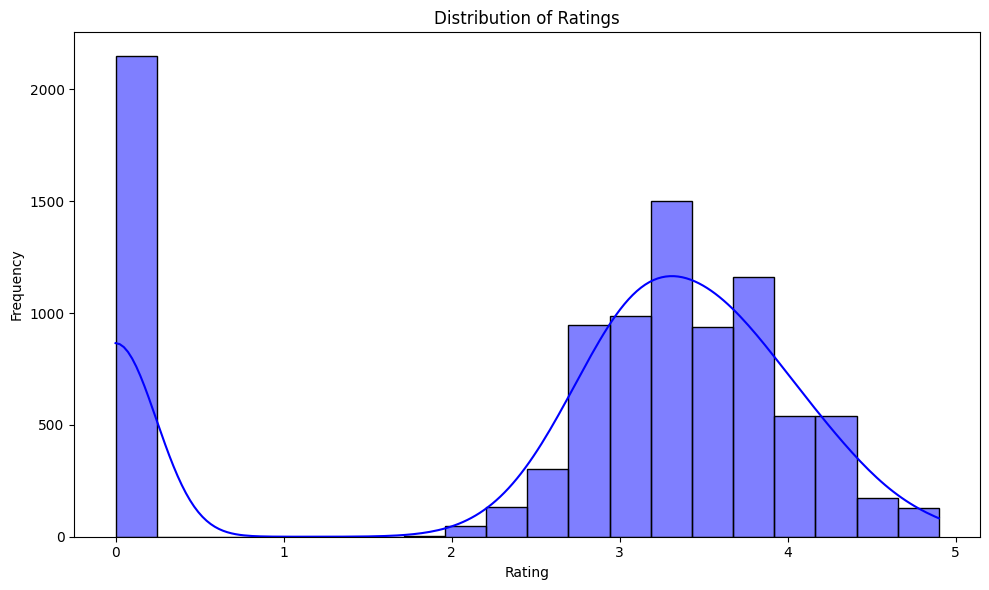

In [350]:
# Distribution of Ratings (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data=exploded_data, x='Aggregate rating', bins=20, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

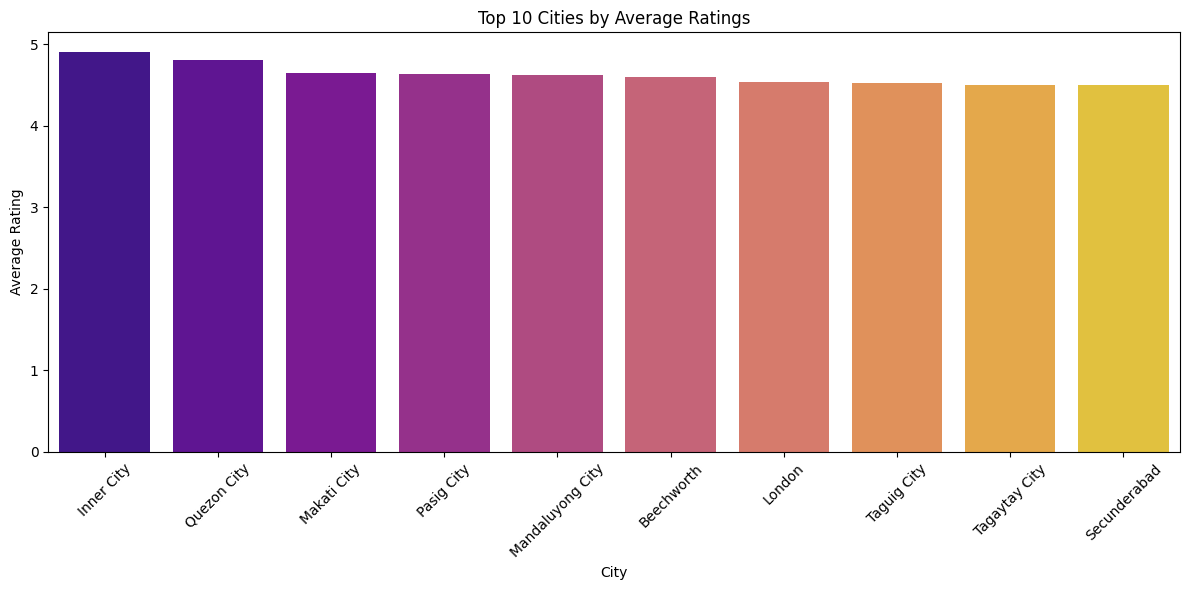

In [349]:
# Bar Plot: Average Ratings by Cities
avg_rating_cities = ds.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
top_cities = avg_rating_cities.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values,hue=top_cities.index, palette='plasma', legend = False)
plt.title('Top 10 Cities by Average Ratings')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

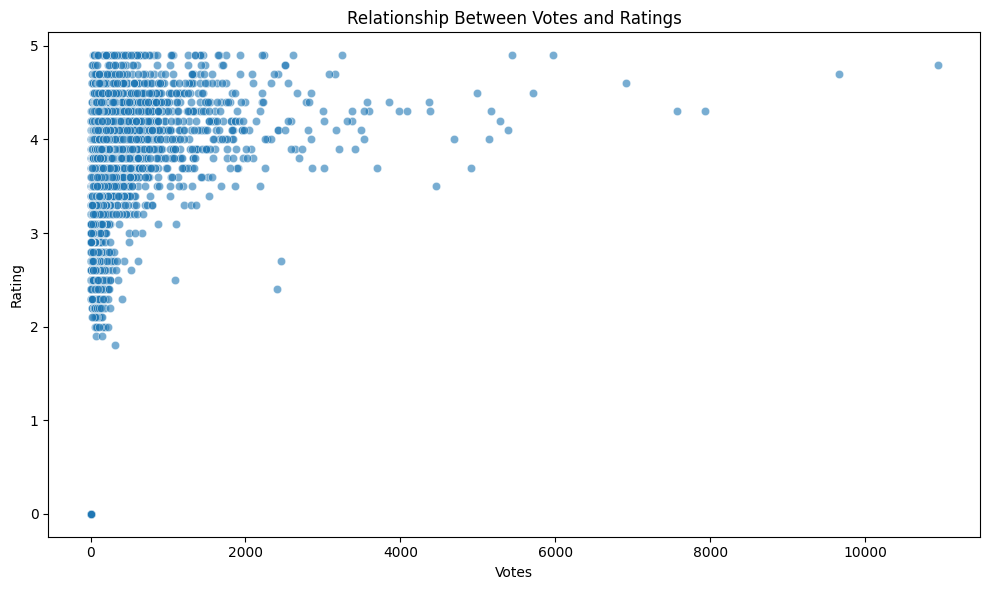

In [348]:
# Scatter Plot: Votes vs. Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=exploded_data, x='Votes', y='Aggregate rating', alpha=0.6)
plt.title('Relationship Between Votes and Ratings')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

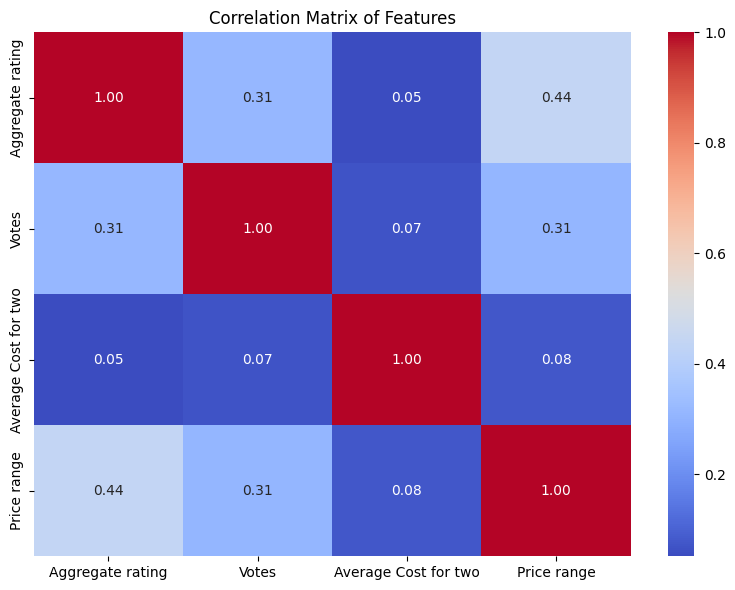

In [347]:
# Heatmap: Correlation Matrix
correlation_features = ds[['Aggregate rating', 'Votes', 'Average Cost for two', 'Price range']]
correlation_matrix = correlation_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

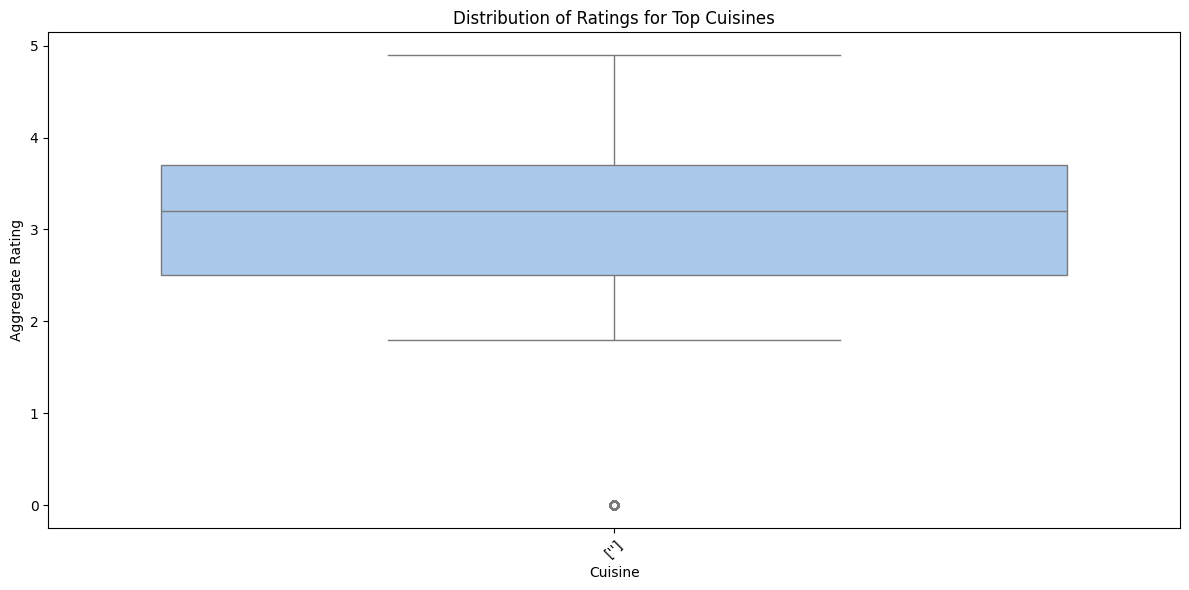

In [346]:
# Box Plot: Ratings by Cuisine
top_cuisine_list = top_cuisines.index.tolist()
filtered_data = exploded_data[exploded_data['Cuisines'].isin(top_cuisine_list)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Cuisines', y='Aggregate rating', hue='Cuisines', palette='pastel', legend=False)
plt.title('Distribution of Ratings for Top Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

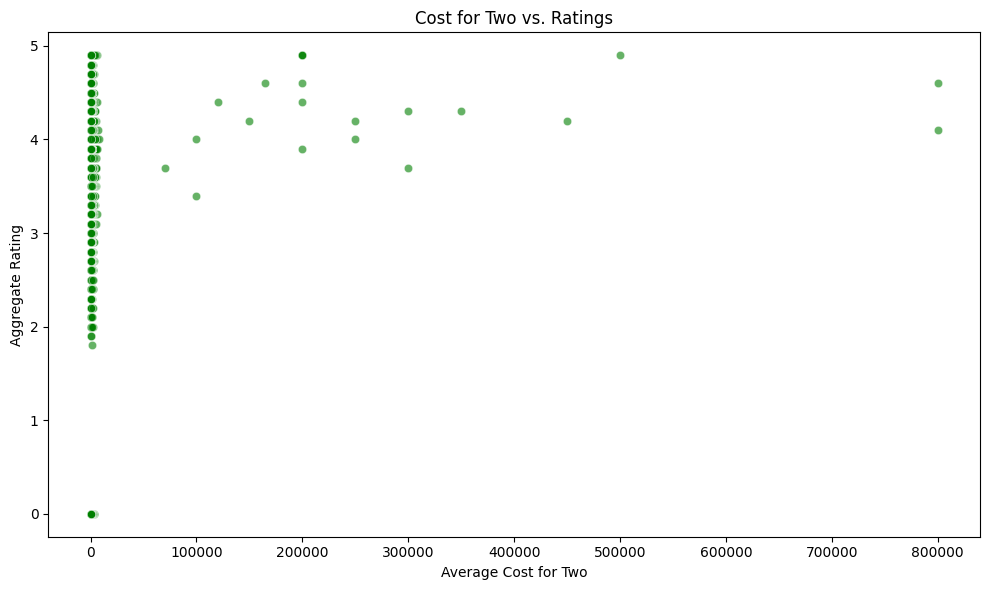

In [310]:
# Scatter Plot: Cost for Two vs. Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds, x='Average Cost for two', y='Aggregate rating', alpha=0.6, color='green')
plt.title('Cost for Two vs. Ratings')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.tight_layout()
plt.show()

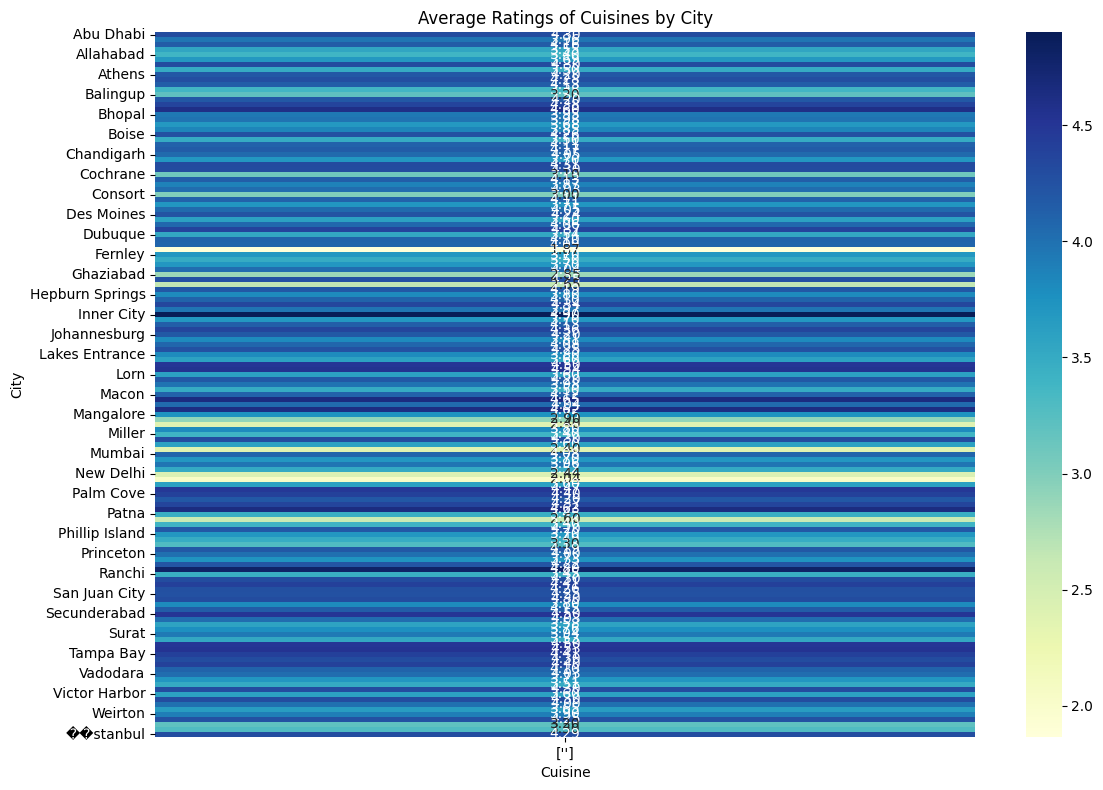

In [309]:
# Heatmap: Average Ratings of Cuisines by City
avg_rating_by_city_cuisine = exploded_data.groupby(['City', 'Cuisines'])['Aggregate rating'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(avg_rating_by_city_cuisine, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Average Ratings of Cuisines by City')
plt.xlabel('Cuisine')
plt.ylabel('City')
plt.tight_layout()
plt.show()

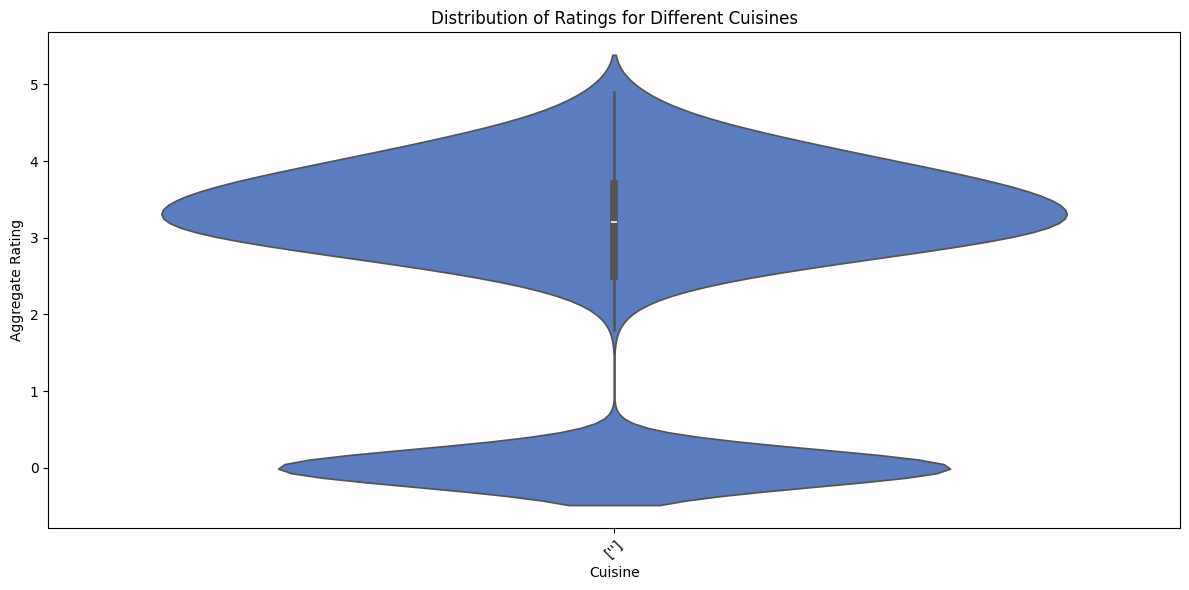

In [308]:
# Violin Plot: Distribution of Ratings for Different Cuisines
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_data, x='Cuisines', y='Aggregate rating',hue = 'Cuisines', palette='muted', legend=False)
plt.title('Distribution of Ratings for Different Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

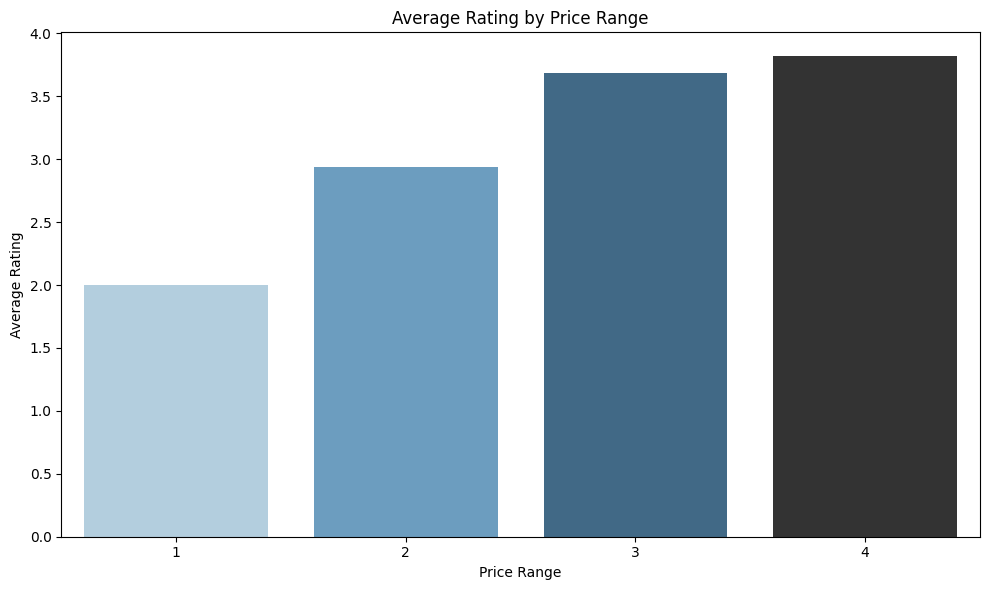

In [314]:
# Bar Plot: Average Rating by Price Range
avg_rating_price_range = ds.groupby('Price range')['Aggregate rating'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_price_range.index, y=avg_rating_price_range.values, hue=avg_rating_price_range.index, palette='Blues_d',legend=False)
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

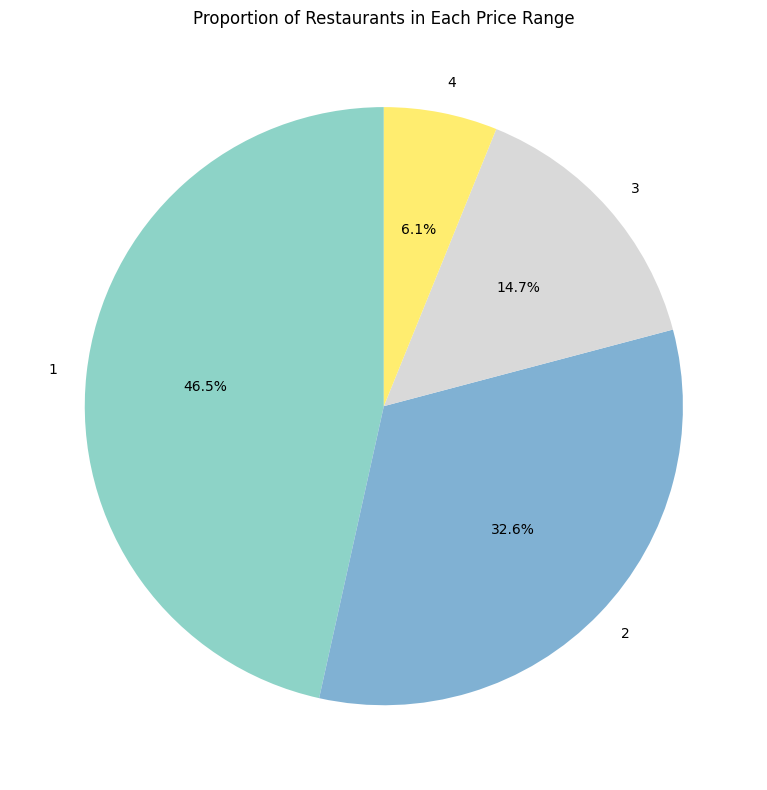

In [325]:
# Pie Chart: Proportion of Restaurants in Each Price Range
price_range_count = ds['Price range'].value_counts()
plt.figure(figsize=(8, 8))
price_range_count.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', legend=False)
plt.title('Proportion of Restaurants in Each Price Range')
plt.ylabel('')
plt.tight_layout()
plt.show()

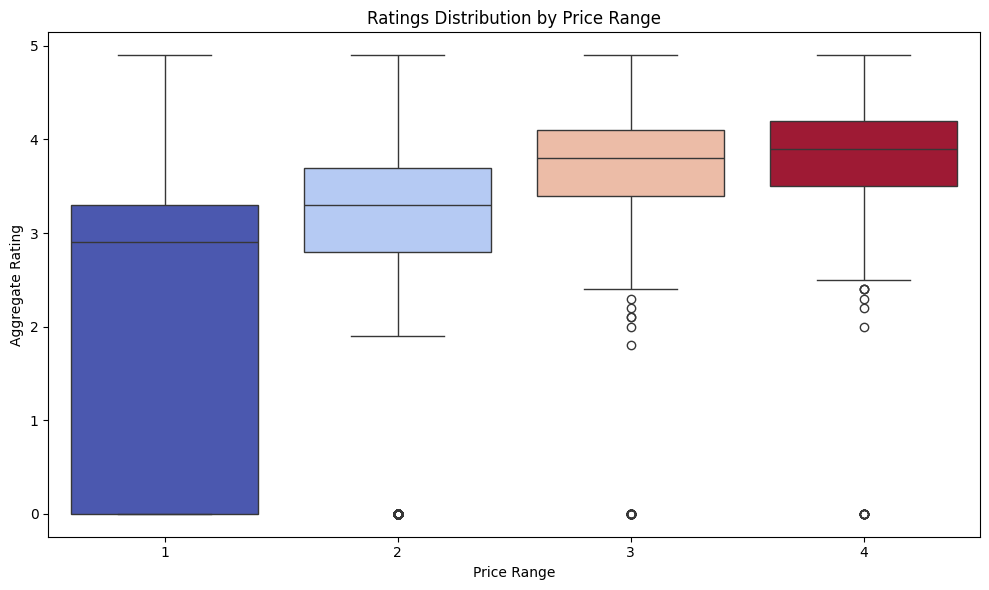

In [332]:
# Box Plot: Ratings Distribution by Price Range
plt.figure(figsize=(10, 6))
sns.boxplot(data=ds, x='Price range', y='Aggregate rating', hue='Price range', palette='coolwarm', legend=False)
plt.title('Ratings Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.tight_layout()
plt.show()

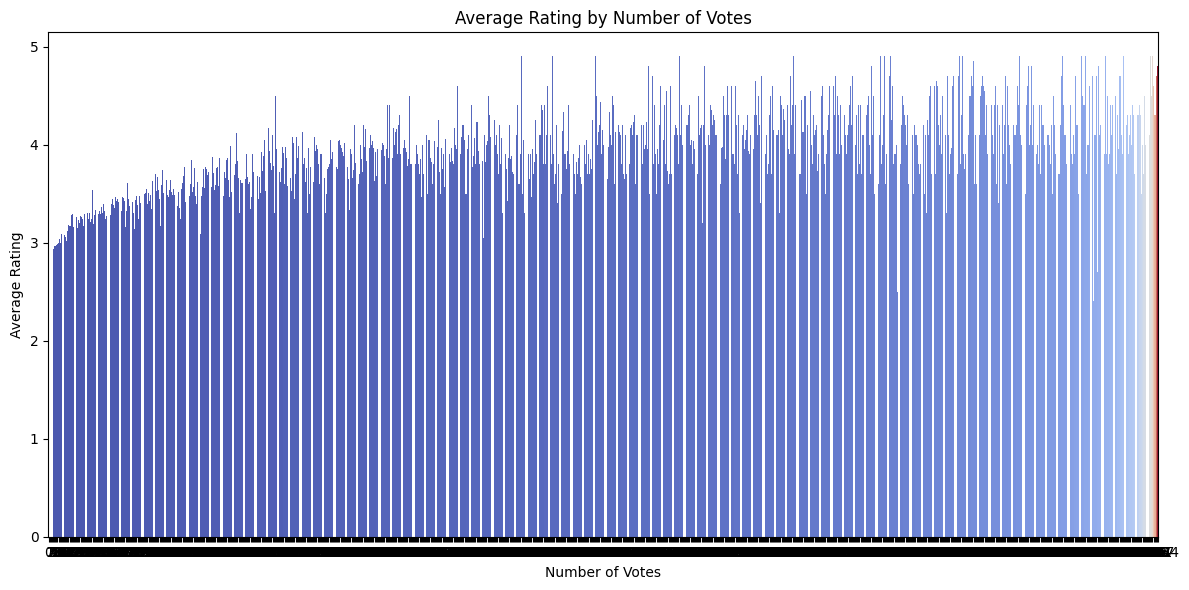

In [345]:
# Average Rating by Number of Votes
avg_rating_by_votes = ds.groupby('Votes')['Aggregate rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Votes', y='Aggregate rating',hue='Votes', data=avg_rating_by_votes, palette='coolwarm', legend=False)
plt.title('Average Rating by Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_6372\4236221233.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

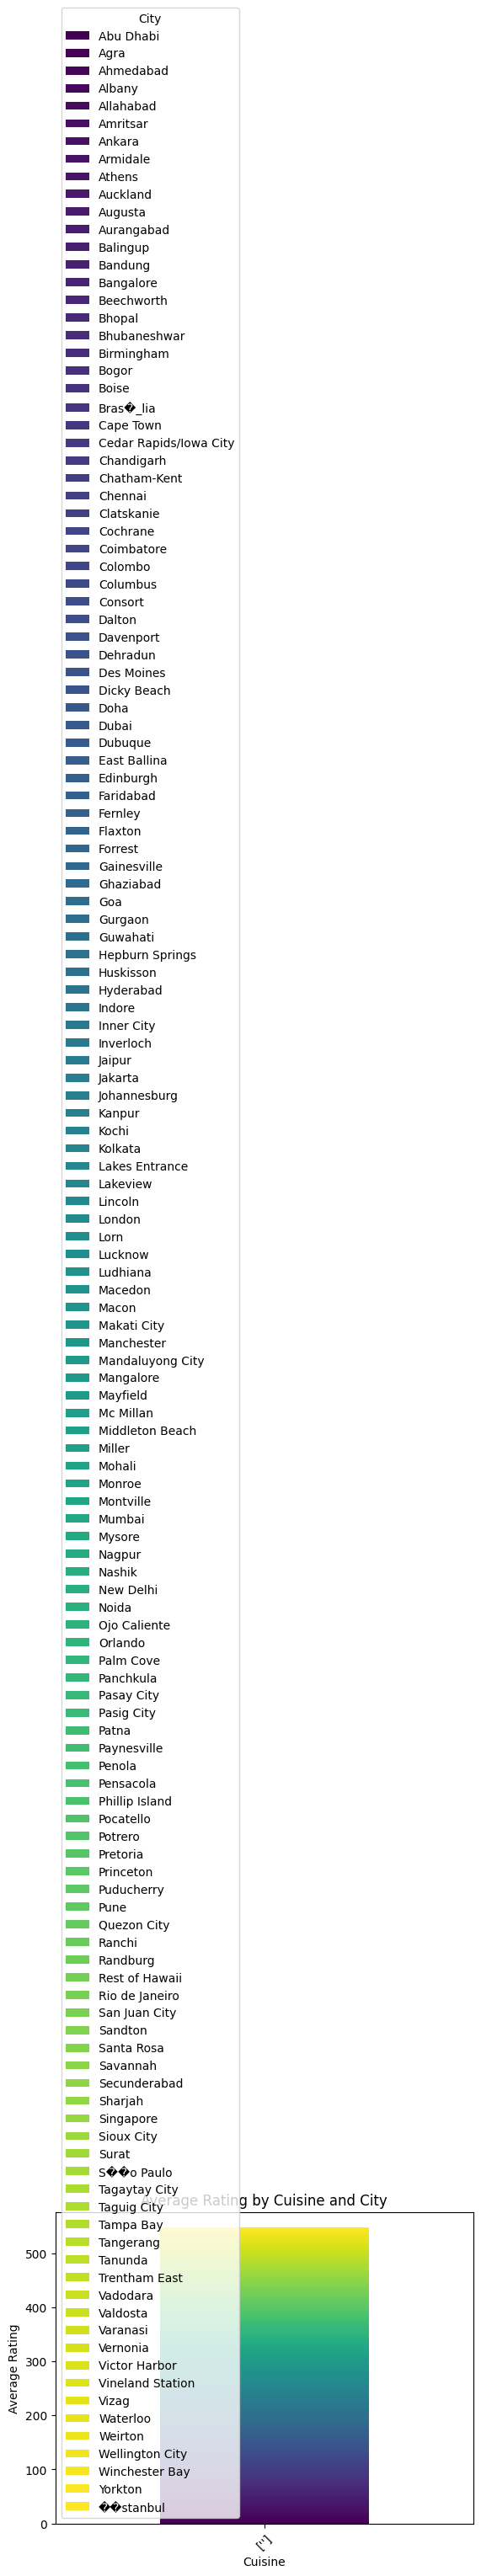

In [344]:
# Bar Plot: Average Rating by Cuisine and City
avg_rating_cuisine_city = exploded_data.groupby(['Cuisines', 'City'])['Aggregate rating'].mean().unstack()
plt.figure(figsize=(12, 6))
avg_rating_cuisine_city.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Average Rating by Cuisine and City')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

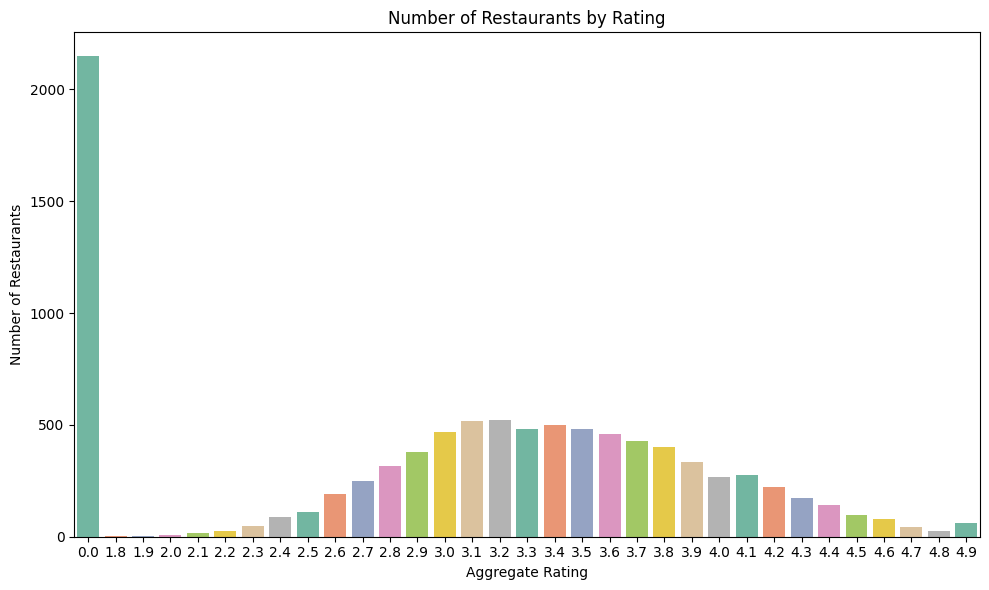

In [343]:
# Count Plot: Number of Restaurants by Rating
plt.figure(figsize=(10, 6))
sns.countplot(x='Aggregate rating', hue='Aggregate rating',data=ds, palette='Set2', legend=False)
plt.title('Number of Restaurants by Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

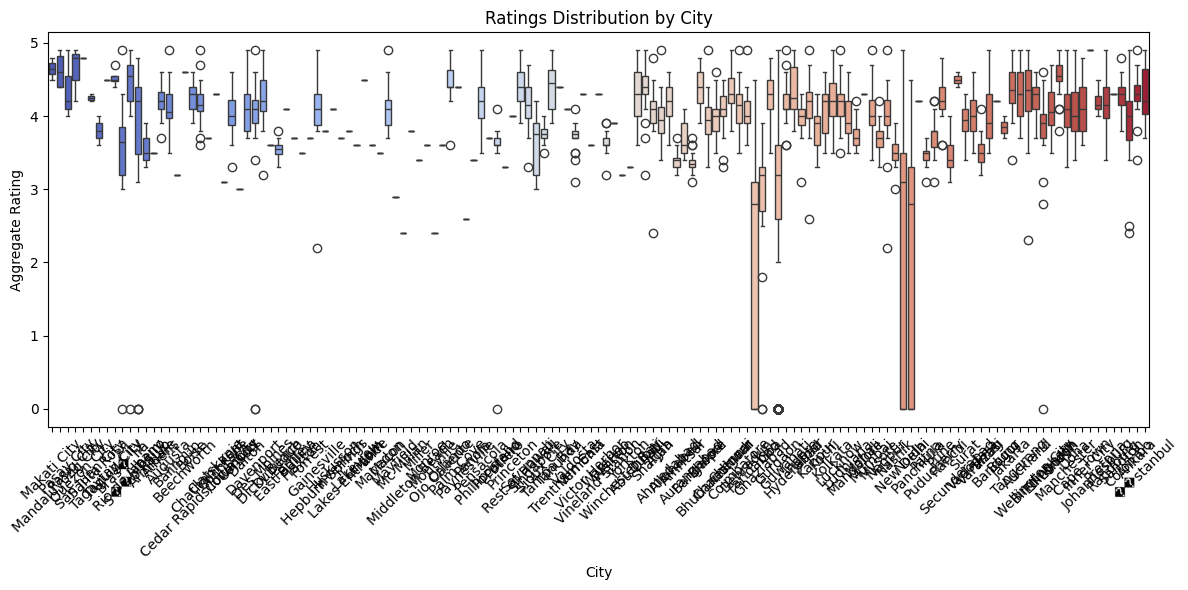

In [342]:
# Box Plot: Ratings by City
plt.figure(figsize=(12, 6))
sns.boxplot(data=ds, x='City', y='Aggregate rating', hue='City', palette='coolwarm', legend=False)
plt.title('Ratings Distribution by City')
plt.xlabel('City')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()